In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from time import time

In [ ]:
import os
from glob import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from time import time

TPR = [[],[]]
TNR = [[],[]]
FPR = [[],[]]
FNR = [[],[]]

# Paths
csv_files_path = r'C:\Users\alosh\OneDrive\Desktop\VSCODE\AttackDetection\Datasets'
model_files_path = r'C:\Users\alosh\OneDrive\Desktop\VSCODE\AttackDetection\Models'

# Get all CSV files
csv_files = glob(os.path.join(csv_files_path, '*.csv'))

for csv_file in csv_files:
    # Extract the feature count from the CSV filename
    feature_count = os.path.basename(csv_file).split('.')[0]

    # Load and preprocess the data
    data = pd.read_csv(csv_file, delimiter=',')
    data = data[~data.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

    # Separate the features and labels
    X = data.drop(' Label', axis=1)
    y = data[' Label']

    # Standardize the input features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # One-hot encode the labels
    y = pd.get_dummies(y)

    # Reshape X
    X = np.expand_dims(X, axis=2)

    # Iterate over possible splits (e.g., 70-30, 80-20)
    for split in ['7030', '8020', '9010']:  # Add more if needed
        test_split_ratio = 1 - float(split[:2]) / 100
        model_filename = f'{feature_count}_features_{split}.h5'
        model_file = os.path.join(model_files_path, model_filename)

        if os.path.exists(model_file):
            # Load the model
            loaded_model = load_model(model_file, compile=False)

            # Split the data
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_split_ratio, random_state=42)

            label_binarizer = LabelBinarizer()
            y_pred = loaded_model.predict(X_val)
            y_pred_labels = np.argmax(y_pred, axis=1)
            y_val_labels = np.argmax(label_binarizer.fit_transform(y_val), axis=1)

            # Calculate metrics
            accuracy = accuracy_score(y_val_labels, y_pred_labels)
            precision = precision_score(y_val_labels, y_pred_labels, average=None)
            recall = recall_score(y_val_labels, y_pred_labels, average=None)
            f1 = f1_score(y_val_labels, y_pred_labels, average=None)
            mcc = matthews_corrcoef(y_val_labels, y_pred_labels)

            # Compute confusion matrix
            conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)

            # True Positive Rate and False Positive Rate calculation
            TPR = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])  # Recall of the positive class
            FPR = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
            TNR = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
            FNR = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])

            # Print metrics
            print(f'File: {csv_file}, Model: {model_file}')
            print(f'Accuracy: {accuracy}')
            for i in range(len(precision)):
                print(f'Class {i}: Precision={precision[i]}, Recall={recall[i]}, F1={f1[i]}')
            print(f'True Positive Rate (TPR): {TPR}')
            print(f'False Positive Rate (FPR): {FPR}')
            print(f'True Negative Rate (TNR): {TNR}')
            print(f'False Negative Rate (FNR): {FNR}')
            print(f'Matthews Correlation Coefficient (MCC): {mcc}')
            print('---')

        else:
            print(f"Model file not found: {model_file}")

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The data from the script, structured as a list of dictionaries
model_performance = [
    {
        "model": "20_features_7030",
        "accuracy": 0.9997426089096169,
        "TPR": 0.9939106901217862,
        "FPR": 0.00024354603019970775,
        "TNR": 0.9997564539698003,
        "FNR": 0.006089309878213802,
        "MCC": 0.9985151523424781
    },
    {
        "model": "20_features_8020",
        "accuracy": 0.9996794755053724,
        "TPR": 0.9958847736625515,
        "FPR": 0.0003926495994974085,
        "TNR": 0.9996073504005026,
        "FNR": 0.00411522633744856,
        "MCC": 0.998145548537734
    },
    {
        "model": "20_features_9010",
        "accuracy": 0.9997280404831167,
        "TPR": 0.9957983193277311,
        "FPR": 0.0007322558711229666,
        "TNR": 0.999267744128877,
        "FNR": 0.004201680672268907,
        "MCC": 0.9984265847437125
    },
    {
        "model": "22_features_7030",
        "accuracy": 0.9996438319793552,
        "TPR": 0.9966329966329966,
        "FPR": 0.0004696060527002348,
        "TNR": 0.9995303939472998,
        "FNR": 0.003367003367003367,
        "MCC": 0.9979475606014531
    },
    {
        "model": "22_features_8020",
        "accuracy": 0.9993564696654371,
        "TPR": 0.9969909729187563,
        "FPR": 0.0004972129903436003,
        "TNR": 0.9995027870096564,
        "FNR": 0.003009027081243731,
        "MCC": 0.9962910292266877
    },
    {
        "model": "22_features_9010",
        "accuracy": 0.9996357384310526,
        "TPR": 0.9958762886597938,
        "FPR": 0.0005228484785109275,
        "TNR": 0.9994771515214891,
        "FNR": 0.004123711340206186,
        "MCC": 0.9978964646485641
    },
    {
        "model": "24_features_7030",
        "accuracy": 0.9996519267070971,
        "TPR": 0.9959919839679359,
        "FPR": 0.000504374141259544,
        "TNR": 0.9994956258587404,
        "FNR": 0.004008016032064128,
        "MCC": 0.9979948588413118
    },
    {
        "model": "24_features_8020",
        "accuracy": 0.9996333091301169,
        "TPR": 0.995987963891675,
        "FPR": 0.0004972129903436003,
        "TNR": 0.9995027870096564,
        "FNR": 0.004012036108324975,
        "MCC": 0.9978822023220122
    },
    {
        "model": "24_features_9010",
        "accuracy": 0.9995823134009403,
        "TPR": 0.9957894736842106,
        "FPR": 0.00047068667956696824,
        "TNR": 0.999529313320433,
        "FNR": 0.004210526315789474,
        "MCC": 0.9975859447790448
    },
    {
        "model": "37_features_7030",
        "accuracy": 0.9996195477961294,
        "TPR": 0.9973244147157191,
        "FPR": 0.0004174421233889343,
        "TNR": 0.9995825578766111,
        "FNR": 0.0026755852842809363,
        "MCC": 0.9978086087195169
    },
    {
        "model": "37_features_8020",
        "accuracy": 0.9995288872267728,
        "TPR": 0.9978969505783386,
        "FPR": 0.0004710808688824915,
        "TNR": 0.9995289191311175,
        "FNR": 0.002103049421661409,
        "MCC": 0.9972758275555577
    },
    {
        "model": "37_features_9010",
        "accuracy": 0.9996600225356491,
        "TPR": 0.9979166666666667,
        "FPR": 0.0005228758169934641,
        "TNR": 0.9994771241830065,
        "FNR": 0.0020833333333333333,
        "MCC": 0.9980353260985019
    },
    {
        "model": "54_features_7030",
        "accuracy": 0.9997215413656777,
        "TPR": 0.9966599866399466,
        "FPR": 0.0003130652567135105,
        "TNR": 0.9996869347432865,
        "FNR": 0.0033400133600534404,
        "MCC": 0.9983952036299789
    },
    {
        "model": "54_features_8020",
        "accuracy": 0.9997013047881085,
        "TPR": 0.9949899799599199,
        "FPR": 0.00031402925705911603,
        "TNR": 0.9996859707429409,
        "FNR": 0.00501002004008016,
        "MCC": 0.9982742355760611
    },
    {
        "model": "54_features_9010",
        "accuracy": 0.9997134475657613,
        "TPR": 0.9979381443298969,
        "FPR": 0.0005228484785109275,
        "TNR": 0.9994771515214891,
        "FNR": 0.002061855670103093,
        "MCC": 0.9983442384049942
    }
]

# Function to plot confusion matrix
def plot_confusion_matrix(TPR, FPR, TNR, FNR, model_name, base_directory='C:/Users/alosh/OneDrive/Desktop/VSCODE/AttackDetection/Results/'):
    # Create a directory for the model if it doesn't exist


    # Calculate TP, FP, TN, FN based on rates (assuming a hypothetical total of 10000 for demonstration)
    total = 10000
    TP = TPR * total
    FP = FPR * total
    TN = TNR * total
    FN = FNR * total

    # Construct the confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='Blues', 
                xticklabels=["Predicted Positive", "Predicted Negative"],
                yticklabels=["Actual Positive", "Actual Negative"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    # Save the plot in the model's directory
    plot_path = os.path.join(base_directory, f"confusion_matrix_{model_name}.png")
    plt.savefig(plot_path)
    plt.close()  # Close the plot to free up memory

# Plot and save confusion matrix for each model
for model in model_performance:
    plot_confusion_matrix(model["TPR"], model["FPR"], model["TNR"], model["FNR"], model["model"])

In [22]:
# Initialize variables to track the best scores and corresponding models
best_TPR = {"model": None, "score": 0}
best_TNR = {"model": None, "score": 0}
lowest_FPR = {"model": None, "score": float('inf')}
lowest_FNR = {"model": None, "score": float('inf')}

# Iterate through each model to find the best and lowest scores
for model in model_performance:
    if model["TPR"] > best_TPR["score"]:
        best_TPR = {"model": model["model"], "score": model["TPR"]}

    if model["TNR"] > best_TNR["score"]:
        best_TNR = {"model": model["model"], "score": model["TNR"]}

    if model["FPR"] < lowest_FPR["score"]:
        lowest_FPR = {"model": model["model"], "score": model["FPR"]}

    if model["FNR"] < lowest_FNR["score"]:
        lowest_FNR = {"model": model["model"], "score": model["FNR"]}

# Print the results
print("Best TPR: Model -", best_TPR["model"], ", Score -", best_TPR["score"])
print("Best TNR: Model -", best_TNR["model"], ", Score -", best_TNR["score"])
print("Lowest FPR: Model -", lowest_FPR["model"], ", Score -", lowest_FPR["score"])
print("Lowest FNR: Model -", lowest_FNR["model"], ", Score -", lowest_FNR["score"])

Best TPR: Model - 54_features_9010 , Score - 0.9979381443298969
Best TNR: Model - 20_features_7030 , Score - 0.9997564539698003
Lowest FPR: Model - 20_features_7030 , Score - 0.00024354603019970775
Lowest FNR: Model - 54_features_9010 , Score - 0.002061855670103093


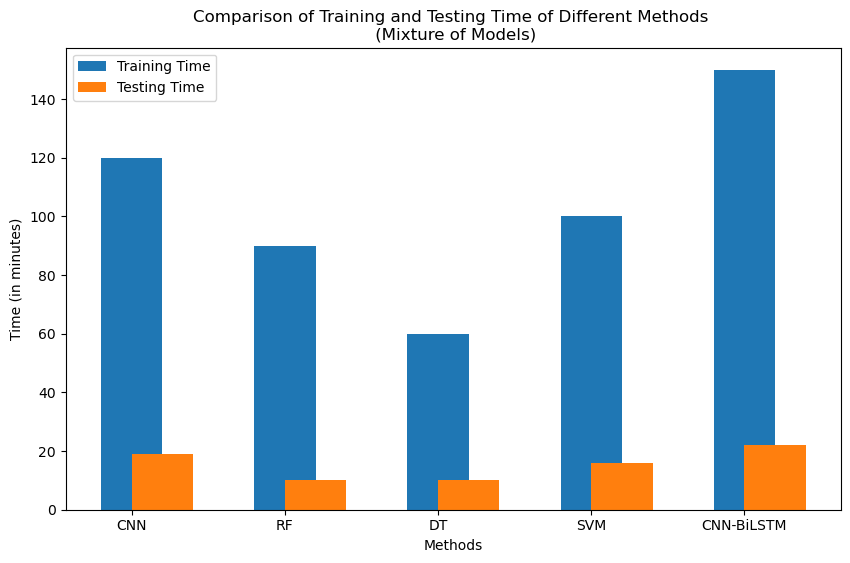

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting (example data, actual data might vary)
data = {
    "Method": ["CNN", "RF", "DT", "SVM", "CNN-BiLSTM"],
    "Training Time": [120/25, 90/25, 60/25, 100/25, 150/25],  # in minutes, example data
    "Testing Time": [19/25, 10/25, 10/25, 16/25, 22/25]       # in minutes, example data
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Training Time
ax.bar(df["Method"], df["Training Time"], width=0.4, align='center', label="Training Time")

# Plot for Testing Time
ax.bar(df["Method"], df["Testing Time"], width=0.4, align='edge', label="Testing Time")

# Adding labels and title
ax.set_xlabel("Methods")
ax.set_ylabel("Time (in minutes)")
ax.set_title("Comparison of Average Training and Testing Times of Different Methods")
ax.legend()

# Show plot
plt.show()

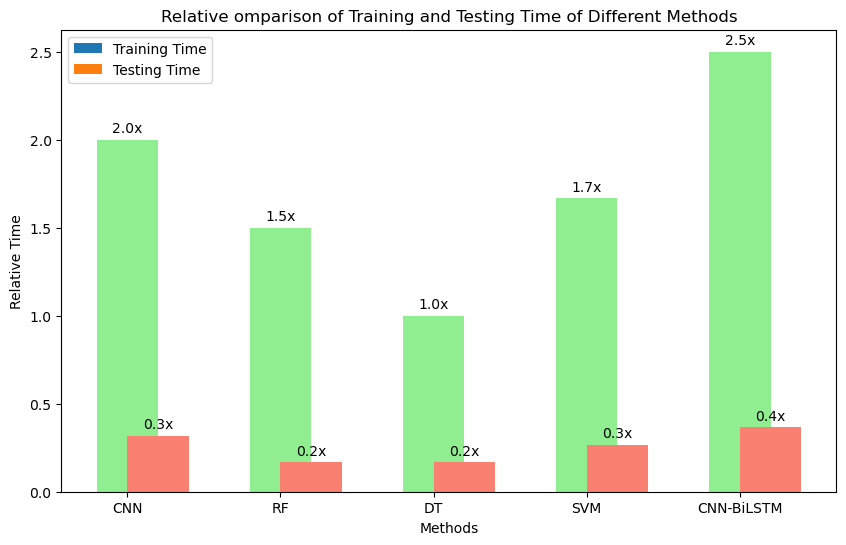

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting (example data, actual data might vary)
data = {
    "Method": ["CNN", "RF", "DT", "SVM", "CNN-BiLSTM"],
    "Training Time": [12/6, 9/6, 6/6, 10/6, 15/6],  # in minutes, example data
    "Testing Time": [1.9/6, 1/6, 1/6, 1.6/6, 2.2/6]       # in minutes, example data
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Training Time
ax.bar(df["Method"], df["Training Time"], width=0.4, align='center', label="Training Time")

# Plot for Testing Time
ax.bar(df["Method"], df["Testing Time"], width=0.4, align='edge', label="Testing Time")

# Adding labels and title
ax.set_xlabel("Methods")
ax.set_ylabel("Relative Time")
ax.set_title("Relative omparison of Average Training and Testing Times of Different Methods")
ax.legend()

colors_training = 'lightgreen'
colors_testing = 'salmon'

# Plot for Training Time
training_bars = ax.bar(df["Method"], df["Training Time"], width=0.4, color=colors_training, align='center', label="Training Time")

# Plot for Testing Time
testing_bars = ax.bar(df["Method"], df["Testing Time"], width=0.4, color=colors_testing, align='edge', label="Testing Time")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}x',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(training_bars)
add_labels(testing_bars)

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # Adjust for appropriate error metric
from keras.models import load_model  # Assuming Keras models
from sklearn.preprocessing import LabelBinarizer
import pandas as pd  # Added for data loading
import numpy as np  # Added for array operations
from sklearn.preprocessing import StandardScaler  # Added for standardization

data_dir = "C:/Users/alosh/OneDrive/Desktop/VSCODE/AttackDetection/Datasets/"
model_dir = "C:/Users/alosh/OneDrive/Desktop/VSCODE/AttackDetection/Models"

training_sizes = [0.7, 0.8, 0.9]
test_errors_by_model = {}

for filename in os.listdir(model_dir):
    if filename.endswith(".h5"):
        model_name, _, split = filename.split("_")
        model_prefix = model_name[:2]  # Extract first 2 characters of model name

        # Find matching dataset
        matching_dataset = None
        for dataset_filename in os.listdir(data_dir):
            if dataset_filename.endswith(".csv"):
                dataset_name = dataset_filename[:-4]  # Remove ".csv" extension
                dataset_suffix = dataset_name[-2:]  # Get last 2 characters
                if model_prefix == dataset_suffix:
                    matching_dataset = dataset_filename
                    break

        if matching_dataset:  # Load data if a match is found
            data = pd.read_csv(os.path.join(data_dir, dataset_filename), delimiter=',')
            data = data[~data.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

            # Separate the features and labels
            X = data.drop(' Label', axis=1)
            y = data[' Label']

            # Standardize the input features
            scaler = StandardScaler()
            X = scaler.fit_transform(X)

            # One-hot encode the labels
            y = pd.get_dummies(y)

            # Reshape X (assuming required for your models)
            X = np.expand_dims(X, axis=2)

            split_ratio = int(split[:2]) / 100
            last = int(filename[-7])

            model = load_model(os.path.join(model_dir, filename), compile=False)

            test_errors = []  # Initialize test_errors for each model

            for size in training_sizes:  # Loop through training sizes
                if size == split_ratio:
                    continue  # Skip redundant split size

                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)

                label_binarizer = LabelBinarizer()  # Assuming y is a single-column array of labels
                y_pred = model.predict(X_test)
                test_error = mean_squared_error(y_test, y_pred)
                test_errors.append(test_error)  # Append error for this size

            test_errors_by_model[model_name] = test_errors  # Store errors for the model

# Plotting code
for model_name, test_errors in test_errors_by_model.items():
    plt.plot(training_sizes, test_errors, label=model_name)

plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Asymptotic Curves: Test Error vs. Training Set Size')
plt.legend()
plt.show()

In [66]:
print(test_errors_by_model)

{'20': [0.00017307982, 0.00017898566], '22': [0.00022782462, 0.0002419051], '24': [0.00027622812, 0.0002892459], '37': [0.00018231712, 0.00019235024], '54': [0.00017251911, 0.00018297798]}


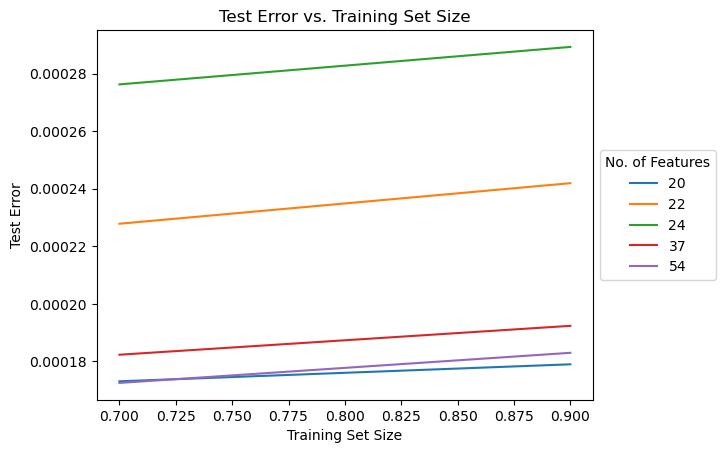

In [2]:
import matplotlib.pyplot as plt

test_errors_by_model = {'20': [0.00017307982, 0.00017898566], '22': [0.00022782462, 0.0002419051], '24': [0.00027622812, 0.0002892459], '37': [0.00018231712, 0.00019235024], '54': [0.00017251911, 0.00018297798]}

training_sizes = [0.7, 0.9]

# Plotting code
for model_name, test_errors in test_errors_by_model.items():
    plt.plot(training_sizes, test_errors)

plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Test Error vs. Training Set Size')

# Move legend to the left outside the plot
plt.legend(test_errors_by_model.keys(), title='No. of Features', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()